### Seasonal Time Series Analysis

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
mpl.rc('figure', figsize = (12, 8))

In [2]:
#import dataset
df = pd.read_csv('MER_T12_06.csv')
df.tail()


,MSN,YYYYMM,Value,Column_Order,Description,Unit
5089,TXEIEUS,201603,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,201604,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,201605,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,201606,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5093,TXEIEUS,201607,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [4]:
df.describe()

,YYYYMM,Column_Order
count,5094.000000,5094.000000
mean,199434.171378,5.000000
std,1257.074138,2.582242
min,197301.000000,1.000000
25%,198312.000000,3.000000
50%,199410.500000,5.000000
75%,200509.000000,7.000000
max,201607.000000,9.000000


In [5]:
#change to timeseries
df.YYYYMM = pd.to_datetime(df.YYYYMM, format='%Y%m', errors = 'coerce')

In [6]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
df.set_index(df.YYYYMM, inplace = True)

In [8]:
df.Value[df.Value == 'Not Available'] = None

In [9]:
df.isnull().sum()

MSN               0
YYYYMM          387
Value           416
Column_Order      0
Description       0
Unit              0
dtype: int64

In [10]:
df_no_null = df.dropna(axis = 'rows')

In [11]:
df_no_null.Value = pd.to_numeric(df_no_null.Value)
df_pivot = df_no_null.pivot_table(index = df_no_null.YYYYMM, columns='Description', values = 'Value')

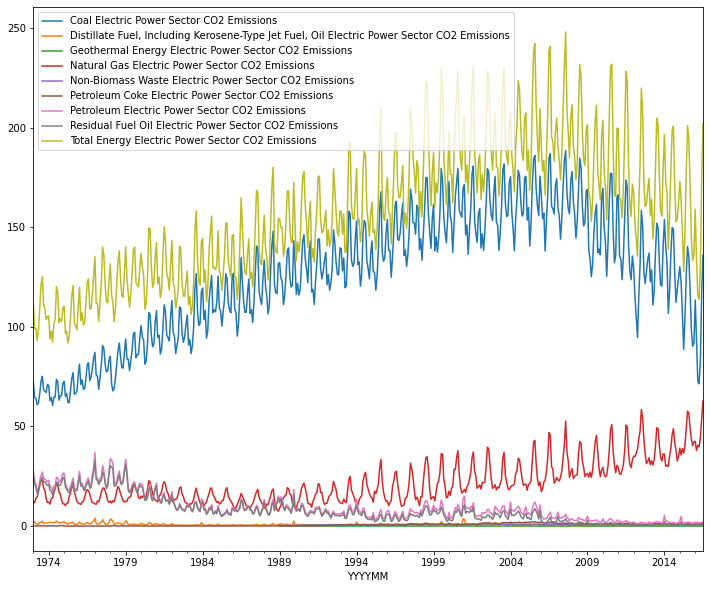

In [42]:
df_pivot.plot(figsize = (12,10))
plt.legend()
plt.show()

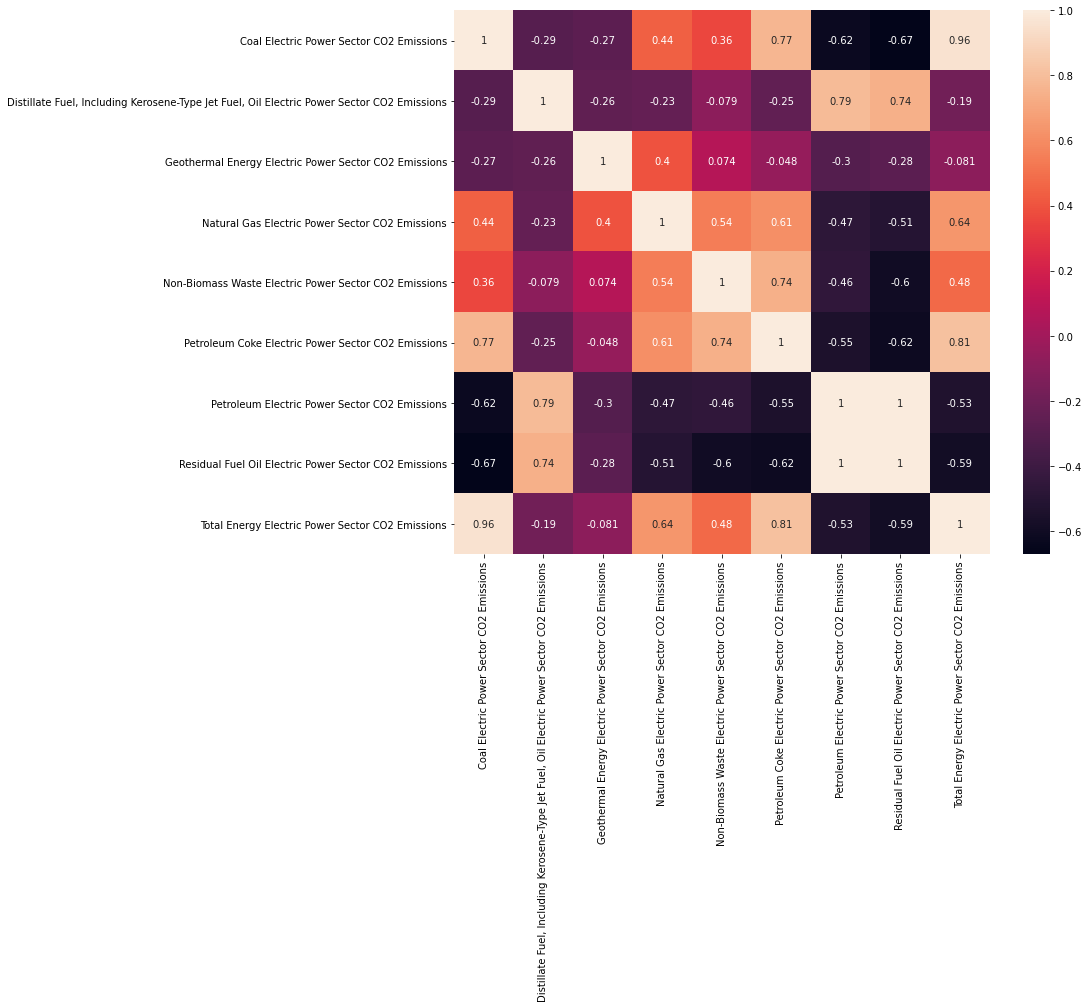

In [13]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_pivot.corr(), annot=True, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Take a variable for seasonal time series analysis's exercise.
Let's try with Natural Gas Electric Power Sector CO2 Emissions

In [14]:
ng_series = df_pivot['Natural Gas Electric Power Sector CO2 Emissions']
ng_series.head

<bound method NDFrame.head of YYYYMM
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
               ...  
2016-03-01    40.525
2016-04-01    39.763
2016-05-01    44.210
2016-06-01    53.567
2016-07-01    62.881
Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 523, dtype: float64>

#### Gathering insights from plotting

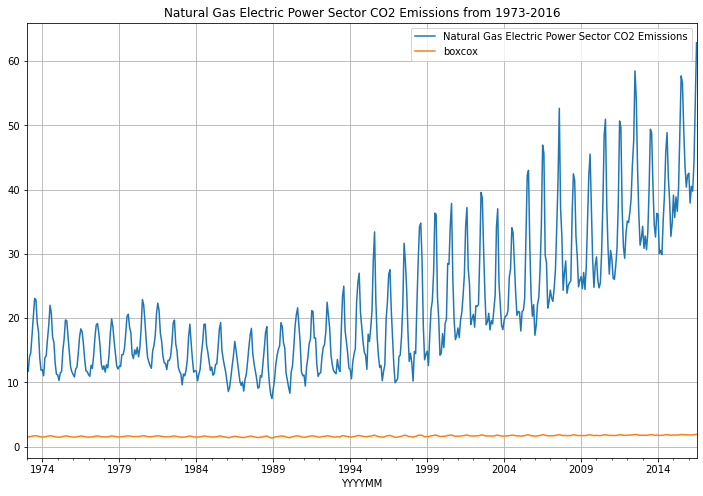

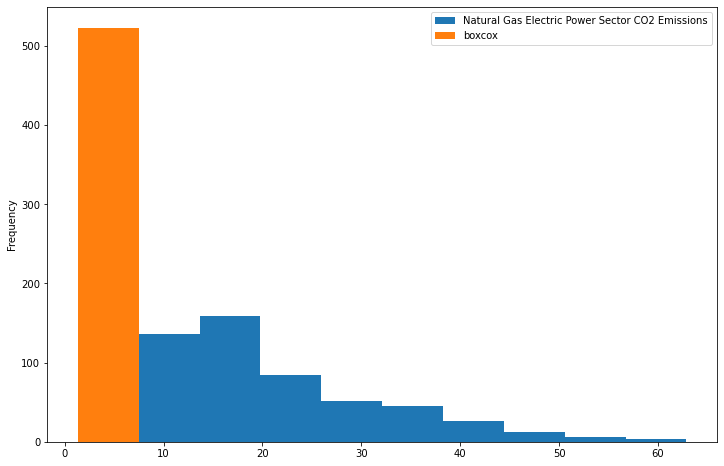

In [43]:
ng_series.plot(grid= True, figsize = (12, 8))
plt.title('Natural Gas Electric Power Sector CO2 Emissions from 1973-2016', size = 12)
plt.show()

ng_series.plot(kind = 'hist')
plt.show()

From plot above, we can see the seasonal pattern and trend with value increasing over time. We try to plot ACF and PACF for further identifcation.

#### Plotting ACF and PCF for further insights

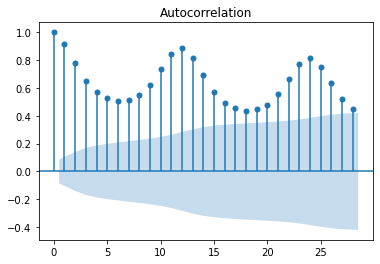

In [16]:
#library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ng_series);

### Stationary, Transform Seasonality and Trend
#### 1. Differencing

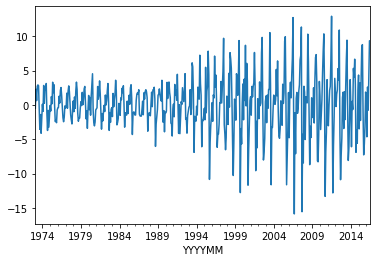

In [17]:
#Plotting
ng_series.diff().dropna().plot()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ng_series.diff().dropna())
adf_test

(-5.435115663121033,
 2.8570111116574967e-06,
 18,
 503,
 {'1%': -3.4434175660489905,
  '5%': -2.8673031724657454,
  '10%': -2.5698395516760275},
 2129.4454545202807)

#### 2. Power Transform using Box-Cox Transform (include/exclude differencing)

Below are some common values for lambda:

lambda = -1. is a reciprocal transform.

lambda = -0.5 is a reciprocal square root transform.

lambda = 0.0 is a log transform.

lambda = 0.5 is a square root transform.

lambda = 1.0 is no transform.

In [19]:
from scipy.stats import boxcox
ng_series = pd.DataFrame(ng_series)

In [20]:
ng_series['boxcox'], lamb = boxcox(ng_series['Natural Gas Electric Power Sector CO2 Emissions'])
print(lamb)


-0.448902013736244


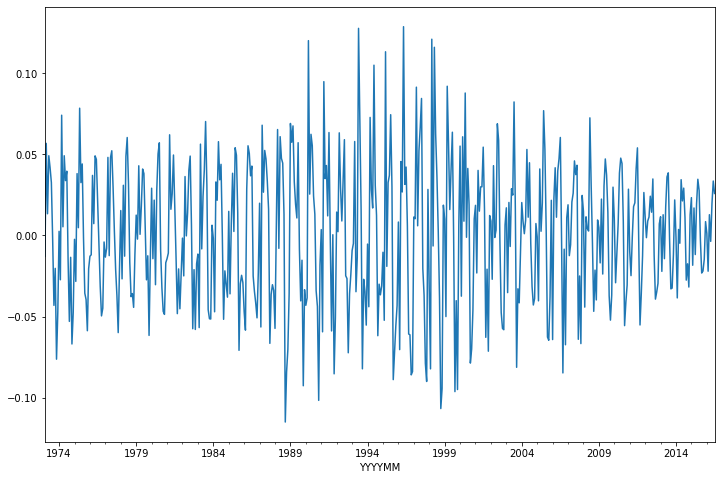

(-4.972513082378959,
 2.514760520277002e-05,
 18,
 503,
 {'1%': -3.4434175660489905,
  '5%': -2.8673031724657454,
  '10%': -2.5698395516760275},
 -2312.122483921379)

In [44]:
ng_series.boxcox.diff().dropna().plot()
plt.show()

#ADF
adf_test = adfuller(ng_series.boxcox.diff().dropna())
adf_test

#### 3. Moving Average (include/exclude differencing)

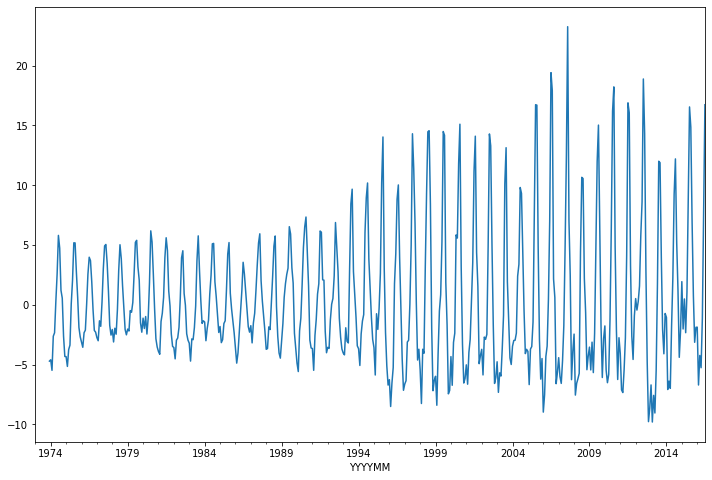

In [45]:
data_value = ng_series['Natural Gas Electric Power Sector CO2 Emissions']
ma = data_value.rolling(12).mean()

differenced_ma = data_value - ma
differenced_ma.plot()
plt.show()

In [23]:
adf_test = adfuller(differenced_ma.dropna())
adf_test

(-5.138976692333442,
 1.1697866171000438e-05,
 19,
 492,
 {'1%': -3.4437112724287253,
  '5%': -2.8674324209387345,
  '10%': -2.569908433637385},
 2003.3390245585367)

#### 4. Residual in seasonal decompose

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose(data_value).plot()
data_value.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01'],
              dtype='datetime64[ns]', name='YYYYMM', length=523, freq=None)

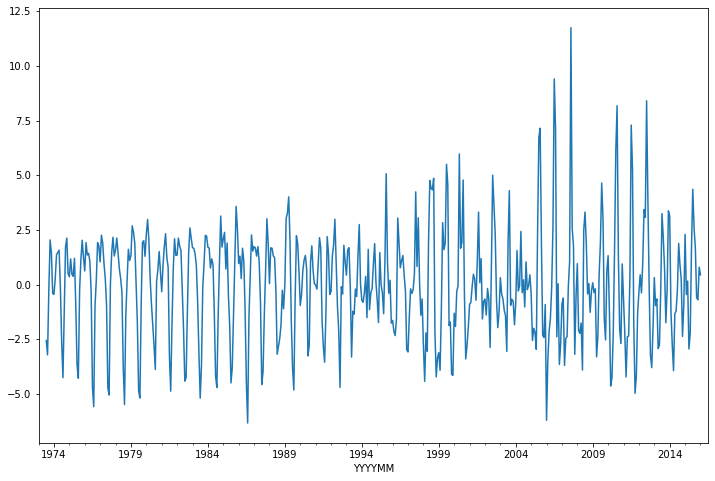

In [46]:
decompose = seasonal_decompose(data_value)
decompose.resid.plot()
plt.show()

In [26]:
adf_test = adfuller(decompose.resid.dropna())
adf_test

(-8.547083808873642,
 9.439345281556007e-14,
 19,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 1765.0376796769326)

Let's choose the suitable one. When data is already stationary, we can say it is the best data. If we transform and force to be stationary, we should retransform after fit the model to our data train, so we take the diferrenced transformation and pay attention to it in the next phase : <b> estimating parameters

### Parameters Estimation

The common methods to estimating parameters for our time series forecasting model are (1) ACF and PACF plots, and (2) grid search using Information Criterion. We will try intepreting using both methods.

#### Intepreting ACF and PACF

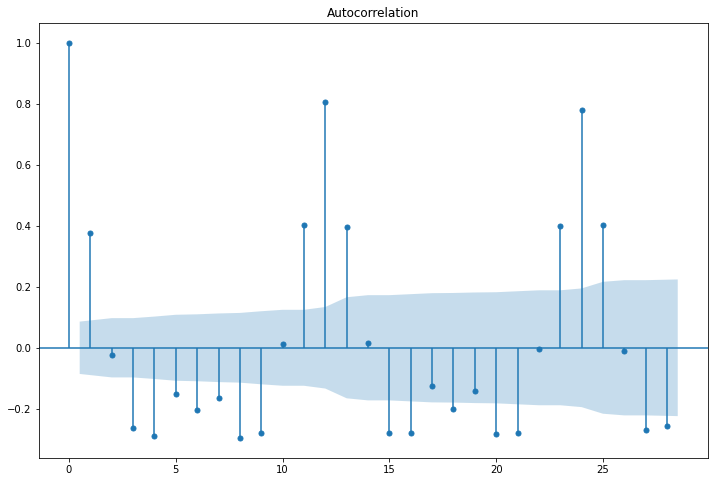

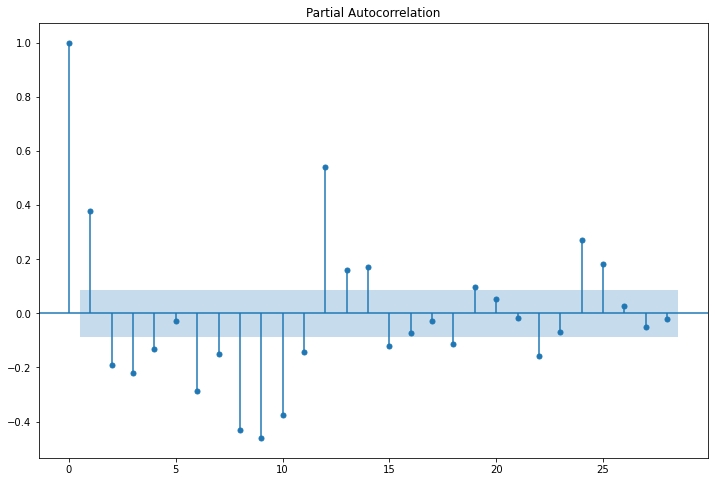

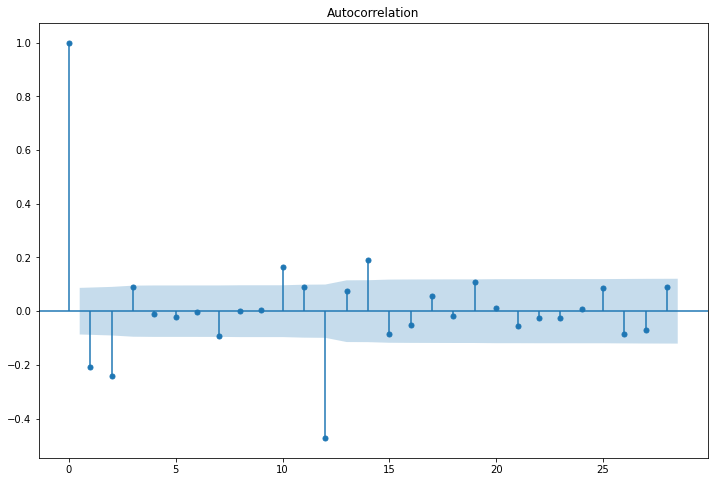

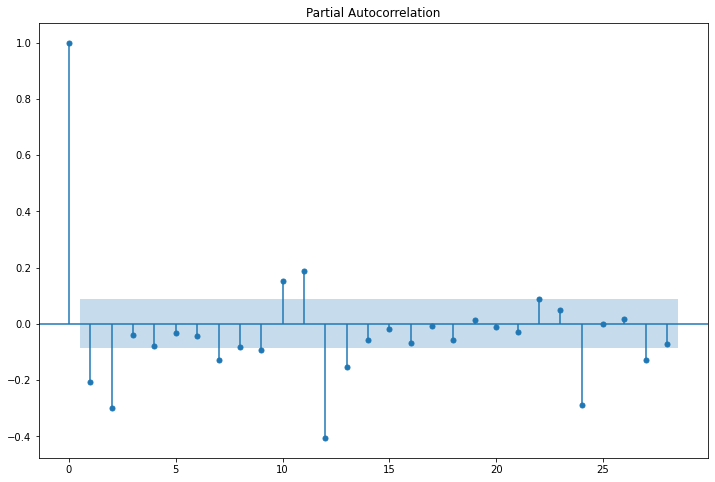

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_acf

#ACF-PACF Differenced Series
differenced_series = data_value.diff().dropna()
plot_acf(differenced_series)
plot_pacf(differenced_series)
plt.show()

#ACF-PACF for Seasonal
differenced_seasonal = differenced_series.diff(12).dropna()
plot_acf(differenced_seasonal)
plot_pacf(differenced_seasonal)
plt.show()

From plots above, the first and second one are differenced with 1 lag data point. We can confirm there is pattern every 12 lag, so it's a seasonal pattern. We expect the AR params is 1. 
The third and the last one are differenced 12 lags in differenced 1 lag data point. We expect AR params is 2 based on PACF. For further estimation, we can use second method using Information Criterion.

In [28]:
#Splitting data point into data train and data test
def spitting(data_point, test_size):
    '''
    Splitting the data point into data train and data test
    Param data_point: selected data point, data series
    Param test_size: data test size in float, example 0.2
    '''
    split_point = int(len(data_point) * (1 - test_size))
    train_data = data_point.head(split_point)
    test_data = data_point.tail(len(data_point) - split_point)
    return train_data, test_data

train_data, test_data = spitting(data_value, test_size=0.3)

In [29]:
#Grid Search
import itertools

p = q = range(3)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Test List : {} x {}'.format(pdq[0], PDQ[0]))
print('Test List : {} x {}'.format(pdq[1], PDQ[1]))

Test List : (0, 0, 0) x (0, 0, 0, 12)
Test List : (0, 0, 1) x (0, 0, 1, 12)


In [30]:
#Import Library and Ignore Warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

estimation = []
#Estimating Parameters
for params in pdq:
    for seasonal_params in PDQ:
        warnings.filterwarnings("ignore")
        model = SARIMAX(train_data, order = params, 
                        seasonal_order = seasonal_params,
                        enforce_invertibility = False,
                        enforce_stationarity = False)
        result = model.fit()
        mae = np.mean(abs(result.resid))
        mape = np.mean(abs(result.resid) / train_data)
        mse = np.mean(result.resid ** 2)
        rmse = np.sqrt(mse)
        estimation.append((params, seasonal_params, 
                           result.aic, result.bic,
                           mae, mape, mse, rmse))
        
estimation_df = pd.DataFrame(estimation, columns=['params', 
                                                  'seasonal_params',
                                                  'AIC', 'BIC',
                                                  'mae', 'mape', 'mse',
                                                  'rmse'])

In [38]:
#By AIC
estimation_df = estimation_df.sort_values(by=['AIC'], ascending=True)
print(estimation_df.head(), '\n')

#By BIC
estimation_df = estimation_df.sort_values(by=['BIC'], ascending = True)
print(estimation_df.head())


        params seasonal_params          AIC          BIC       mae      mape  \
311  (2, 1, 2)   (0, 1, 2, 12)  1205.426424  1231.934706  1.149793  0.071299   
317  (2, 1, 2)   (1, 1, 2, 12)  1206.299281  1236.594461  1.159665  0.072298   
203  (1, 1, 2)   (0, 1, 2, 12)  1207.732647  1230.454031  1.142160  0.070882   
323  (2, 1, 2)   (2, 1, 2, 12)  1208.592838  1242.674915  1.146328  0.071064   
185  (1, 1, 1)   (0, 1, 2, 12)  1208.783445  1227.733246  1.142405  0.070881   

          mse      rmse  
311  2.813324  1.677297  
317  2.800590  1.673496  
203  2.774552  1.665699  
323  2.754136  1.659559  
185  2.768203  1.663792   

        params seasonal_params          AIC          BIC       mae      mape  \
185  (1, 1, 1)   (0, 1, 2, 12)  1208.783445  1227.733246  1.142405  0.070881   
203  (1, 1, 2)   (0, 1, 2, 12)  1207.732647  1230.454031  1.142160  0.070882   
95   (0, 1, 2)   (0, 1, 2, 12)  1212.127553  1231.062040  1.154784  0.071979   
311  (2, 1, 2)   (0, 1, 2, 12)  1205.4264

We have assumed that the pdq parameters will be in AR lags 1, and PDQ parameters in MA 2 lags based on ACF and PACF plots. After we get the Information Criterion result, the lowest AIC and BIC score is different, but with same value of MA with 2 lags in Seasonal parameters. We will stick to first assumption, and take the suitable parameters from Information Criterion. We can choose (1, 1, 2) x (0, 1, 2, 12) as our model parameters.

#### Fitting Model with Chosen Parameters in Data Train

In [48]:
#Fitting
model = SARIMAX(train_data, 
                order = (1, 1, 2), 
                seasonal_order = (0, 1, 2, 12),
                enforce_invertibility = False,
                enforce_stationarity = False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  366
Model:                              SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -597.866
Date:                                             Fri, 18 Dec 2020   AIC                           1207.733
Time:                                                     19:54:49   BIC                           1230.454
Sample:                                                 01-01-1973   HQIC                          1216.800
                                                      - 06-01-2003                                         
Covariance Type:                                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5093      0.102      4.988      0.000       0.309       0.709
ma.L1         -0.8303      0.108     -7.680      0.000      -1.042      -0.618
ma.L2         -0.0771      0.079     -0.973      0.331      -0.232       0.078
ma.S.L12      -0.6648      0.048    -13.966      0.000      -0.758      -0.572
ma.S.L24       0.0146      0.040      0.363      0.716      -0.064       0.093
sigma2         2.2734      0.137     16.614      0.000       2.005       2.542
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                44.23
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               6.94   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let's intepreting the summary result. We can identification that there are two significant p-values: ma.L2 and ma.S.L.24, means that the chosen lags is not suitable with our data train. Unfortunately, our assumption is denied. Okay, no problem. We can try another model based on last model's summary: (1, 1, 1) x (0, 1, 1) because each parameter has p-value almost equals 0. 

In [49]:
#Re-fitting
model = SARIMAX(train_data, 
                order = (1, 1, 1), 
                seasonal_order = (0, 1, 1, 12),
                enforce_invertibility = False,
                enforce_stationarity = False)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  366
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -617.552
Date:                                             Fri, 18 Dec 2020   AIC                           1243.105
Time:                                                     20:37:54   BIC                           1258.409
Sample:                                                 01-01-1973   HQIC                          1249.203
                                                      - 06-01-2003                                         
Covariance Type:                                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5824      0.053     10.898      0.000       0.478       0.687
ma.L1         -0.9239      0.031    -30.266      0.000      -0.984      -0.864
ma.S.L12      -0.6466      0.035    -18.282      0.000      -0.716      -0.577
sigma2         2.2187      0.126     17.657      0.000       1.972       2.465
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                54.31
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               6.65   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Wow, we expected before that the new parameters will fit with our data train. Almost 0 in P>|z|, means the model is fitting nicely with our data train. Next we can interpret the Ljung-Box and Jarque-Bera. Both have different value and p-value. 

First, Ljung-Box, with null hypotesis: no correlation in the residual. Because of the significant p-value, the model rejects its null hypothesis, means the model fittingly catchs the pattern, and the residual has correlation. The next is Jarque-Bera with null hypothesis: the residuals is normally distributed. Our model has zero p-value, means so it fails to reject the nll hypothesis.

We will advance to next phase: Plotting our fitted train data.

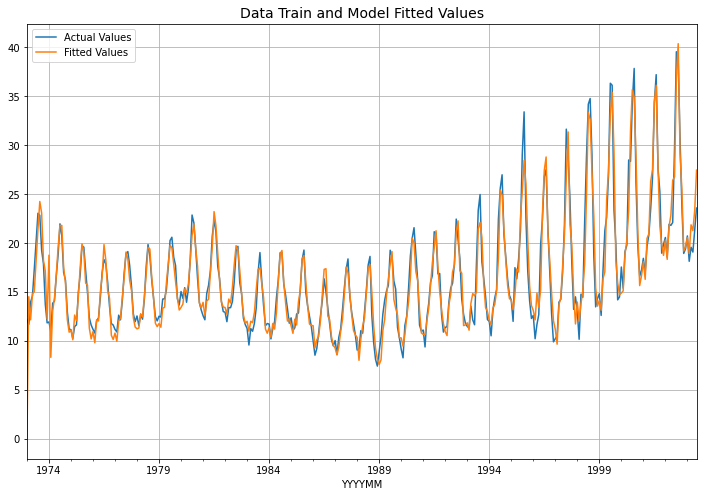

In [51]:
#Plotting
train_data.plot(label = 'Actual Values', grid = True)
result.fittedvalues.plot(label = 'Fitted Values', grid = True)
plt.legend()
plt.title('Data Train and Model Fitted Values', size = 14)
plt.show()